In [1]:
%load_ext autoreload
%autoreload 2

02:23:30 - INFO: Sampling 4 new images....
699it [01:05, 10.67it/s]


0.00392156862745098
0.06274509803921569
0.09019607843137255
0.10196078431372549


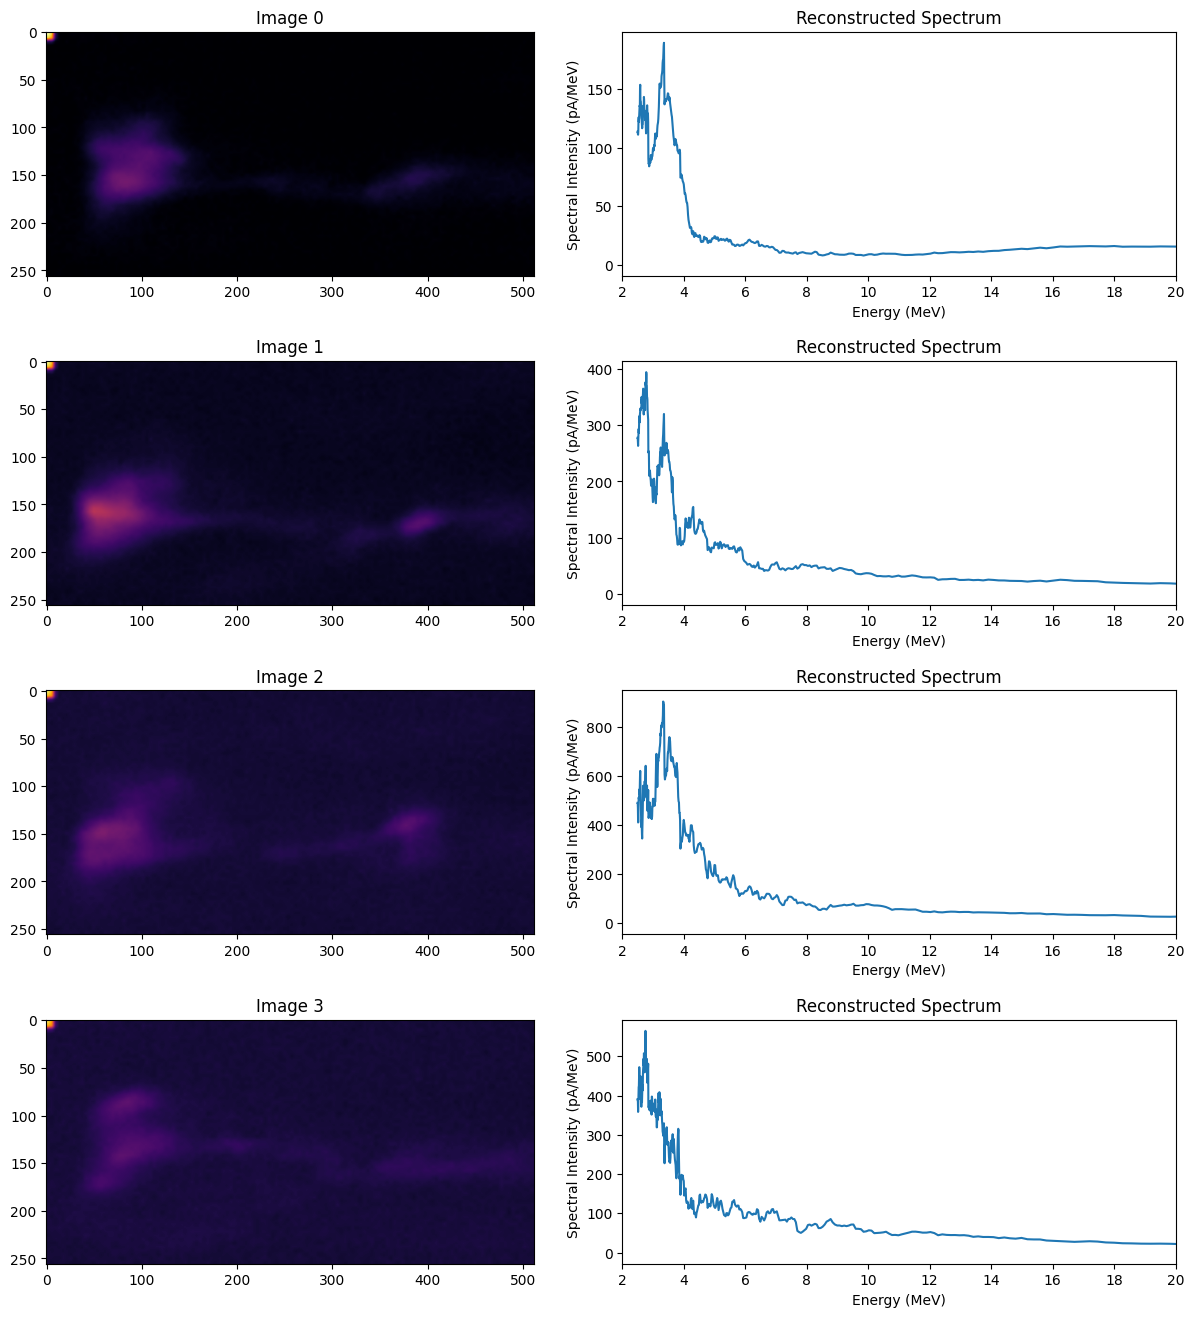

In [5]:
from ddpm_conditional import *
from utils import plot_images, plot_images_from_dir, plot_image_pairs

n = 4
device = "cuda:0"
# 32, 4, 15 - very dark
# 23, 25, 20 - bright, noisy
# 32, 15, 10 - multiple clusters
# 15, 15, 20 - thin line
# 19, 15, 20 - thicker line, more up and bent
# 25, 15, 20 - blob on the left, vague line from it, noisy
# 25, 15, 40 - crazy bright smudge
# 
# 12-26, 10.5-38, 10-40
E = 32
P = 15
ms = 10

model = UNet_conditional(img_width=128, img_height=64, feat_num=3, device=device).to(device)
ckpt = torch.load("models/spec_ema_995/ema_ckpt.pt", map_location=device)
model.load_state_dict(ckpt)
diffusion = Diffusion(img_width=128, img_height=64, device=device, noise_steps=700)
y = torch.Tensor([E,P,ms]).to(device).float().unsqueeze(0) # parameter vector
x = diffusion.sample(model, n, y, cfg_scale=5, resize=[256, 512])
# print(x)
plot_image_pairs(x, xlim=[2,20], electron_pointing_pixel=62)
# plot_images(x)
# save_samples(x)

In [3]:
model

UNet_conditional(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): GroupNorm(1, 64, eps=1e-05, affine=True)
      (2): GELU(approximate='none')
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): GroupNorm(1, 64, eps=1e-05, affine=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): GroupNorm(1, 64, eps=1e-05, affine=True)
          (2): GELU(approximate='none')
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): GroupNorm(1, 64, eps=1e-05, affine=True)
        )
      )
      (2): DoubleConv(
        (double_conv): Sequenti

In [17]:
def save_samples(images, folder="samples"):
    ndarr = images.permute(0, 2, 3, 1).to('cpu').numpy()
    for i, im in enumerate(ndarr):
        cv2.imwrite(folder + "/" + str(i) + ".png", im)
save_samples(x)

  1%|          | 3/300 [00:00<00:43,  6.82it/s]

100%|██████████| 300/300 [00:50<00:00,  5.91it/s]


[230, 25, 230, 460, 25, 460]
0.0
[230, 25, 230, 460, 25, 460]
0.0
[230, 25, 230, 460, 25, 460]
0.08235294117647059
[230, 25, 230, 460, 25, 460]
0.01568627450980392
[230, 25, 230, 460, 25, 460]
0.0
[230, 25, 230, 460, 25, 460]
0.0
[230, 25, 230, 460, 25, 460]
0.0
[230, 25, 230, 460, 25, 460]
0.01568627450980392


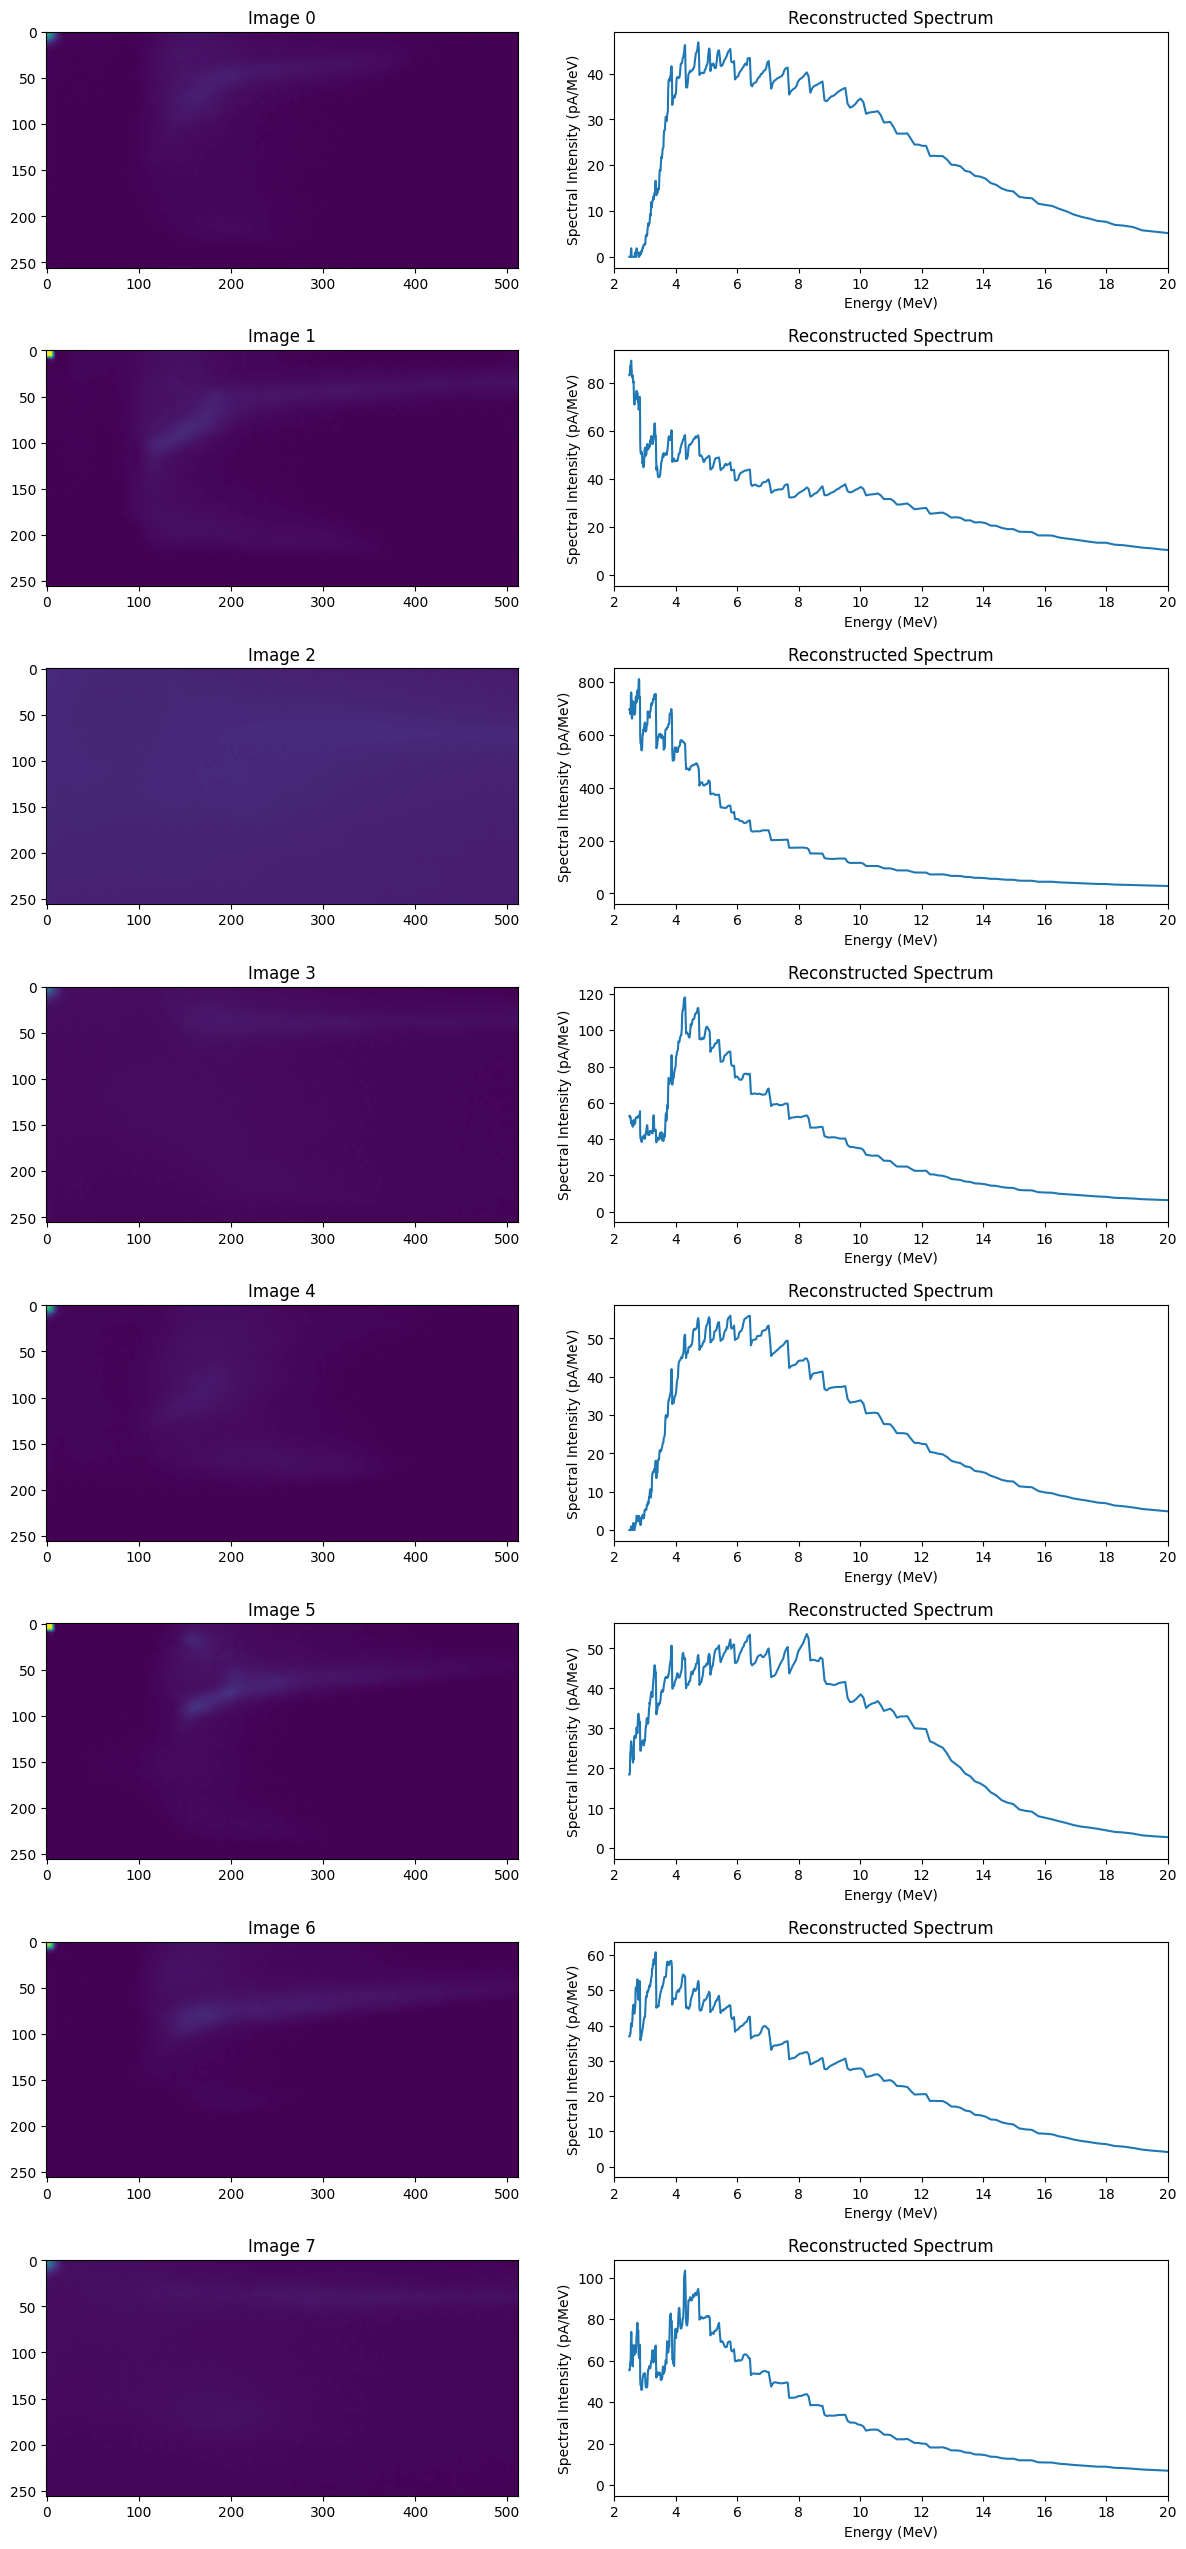

In [5]:
from ddpm_conditional import *
from utils import plot_images, plot_images_from_dir, plot_image_pairs
import argparse
parser = argparse.ArgumentParser()
args = parser.parse_args(args=[])
args.batch_size = 8
args.image_height = 64
args.image_width = 128
args.features = ["E","P","ms"]
args.dataset_path = r"with_gain"
args.csv_path = "params.csv"
args.exclude = []# ['train/19']
delta = 0.0125
blur_sigma_max = 128
blur_sigma_min = 0.5

n = 4
device = "cuda:0"
model = UNet_conditional(img_width=128, img_height=64, feat_num=3, device=device).to(device)
ckpt = torch.load("models/IHD_with_gain/ema_ckpt.pt")
# ckpt = torch.load("models/transfer_specific_batchbigger/ema_ckpt.pt")
model.load_state_dict(ckpt)
model.eval()
diffusion = DCTBlur(img_width=128, img_height=64, device=device, noise_steps=300)
diffusion.prepare_blur_schedule(blur_sigma_max, blur_sigma_min)
y = torch.Tensor([26,10.5,10]).to(device).float().unsqueeze(0) # parameter vector
x = diffusion.sample(trainloader=get_data(args), device=device, model=model, delta=delta, settings=y, resize=(256, 512))
# print(x)
plot_image_pairs(x, xlim=[2,20], electron_pointing_pixel=62)
# plot_images(x)
# save_samples(x)

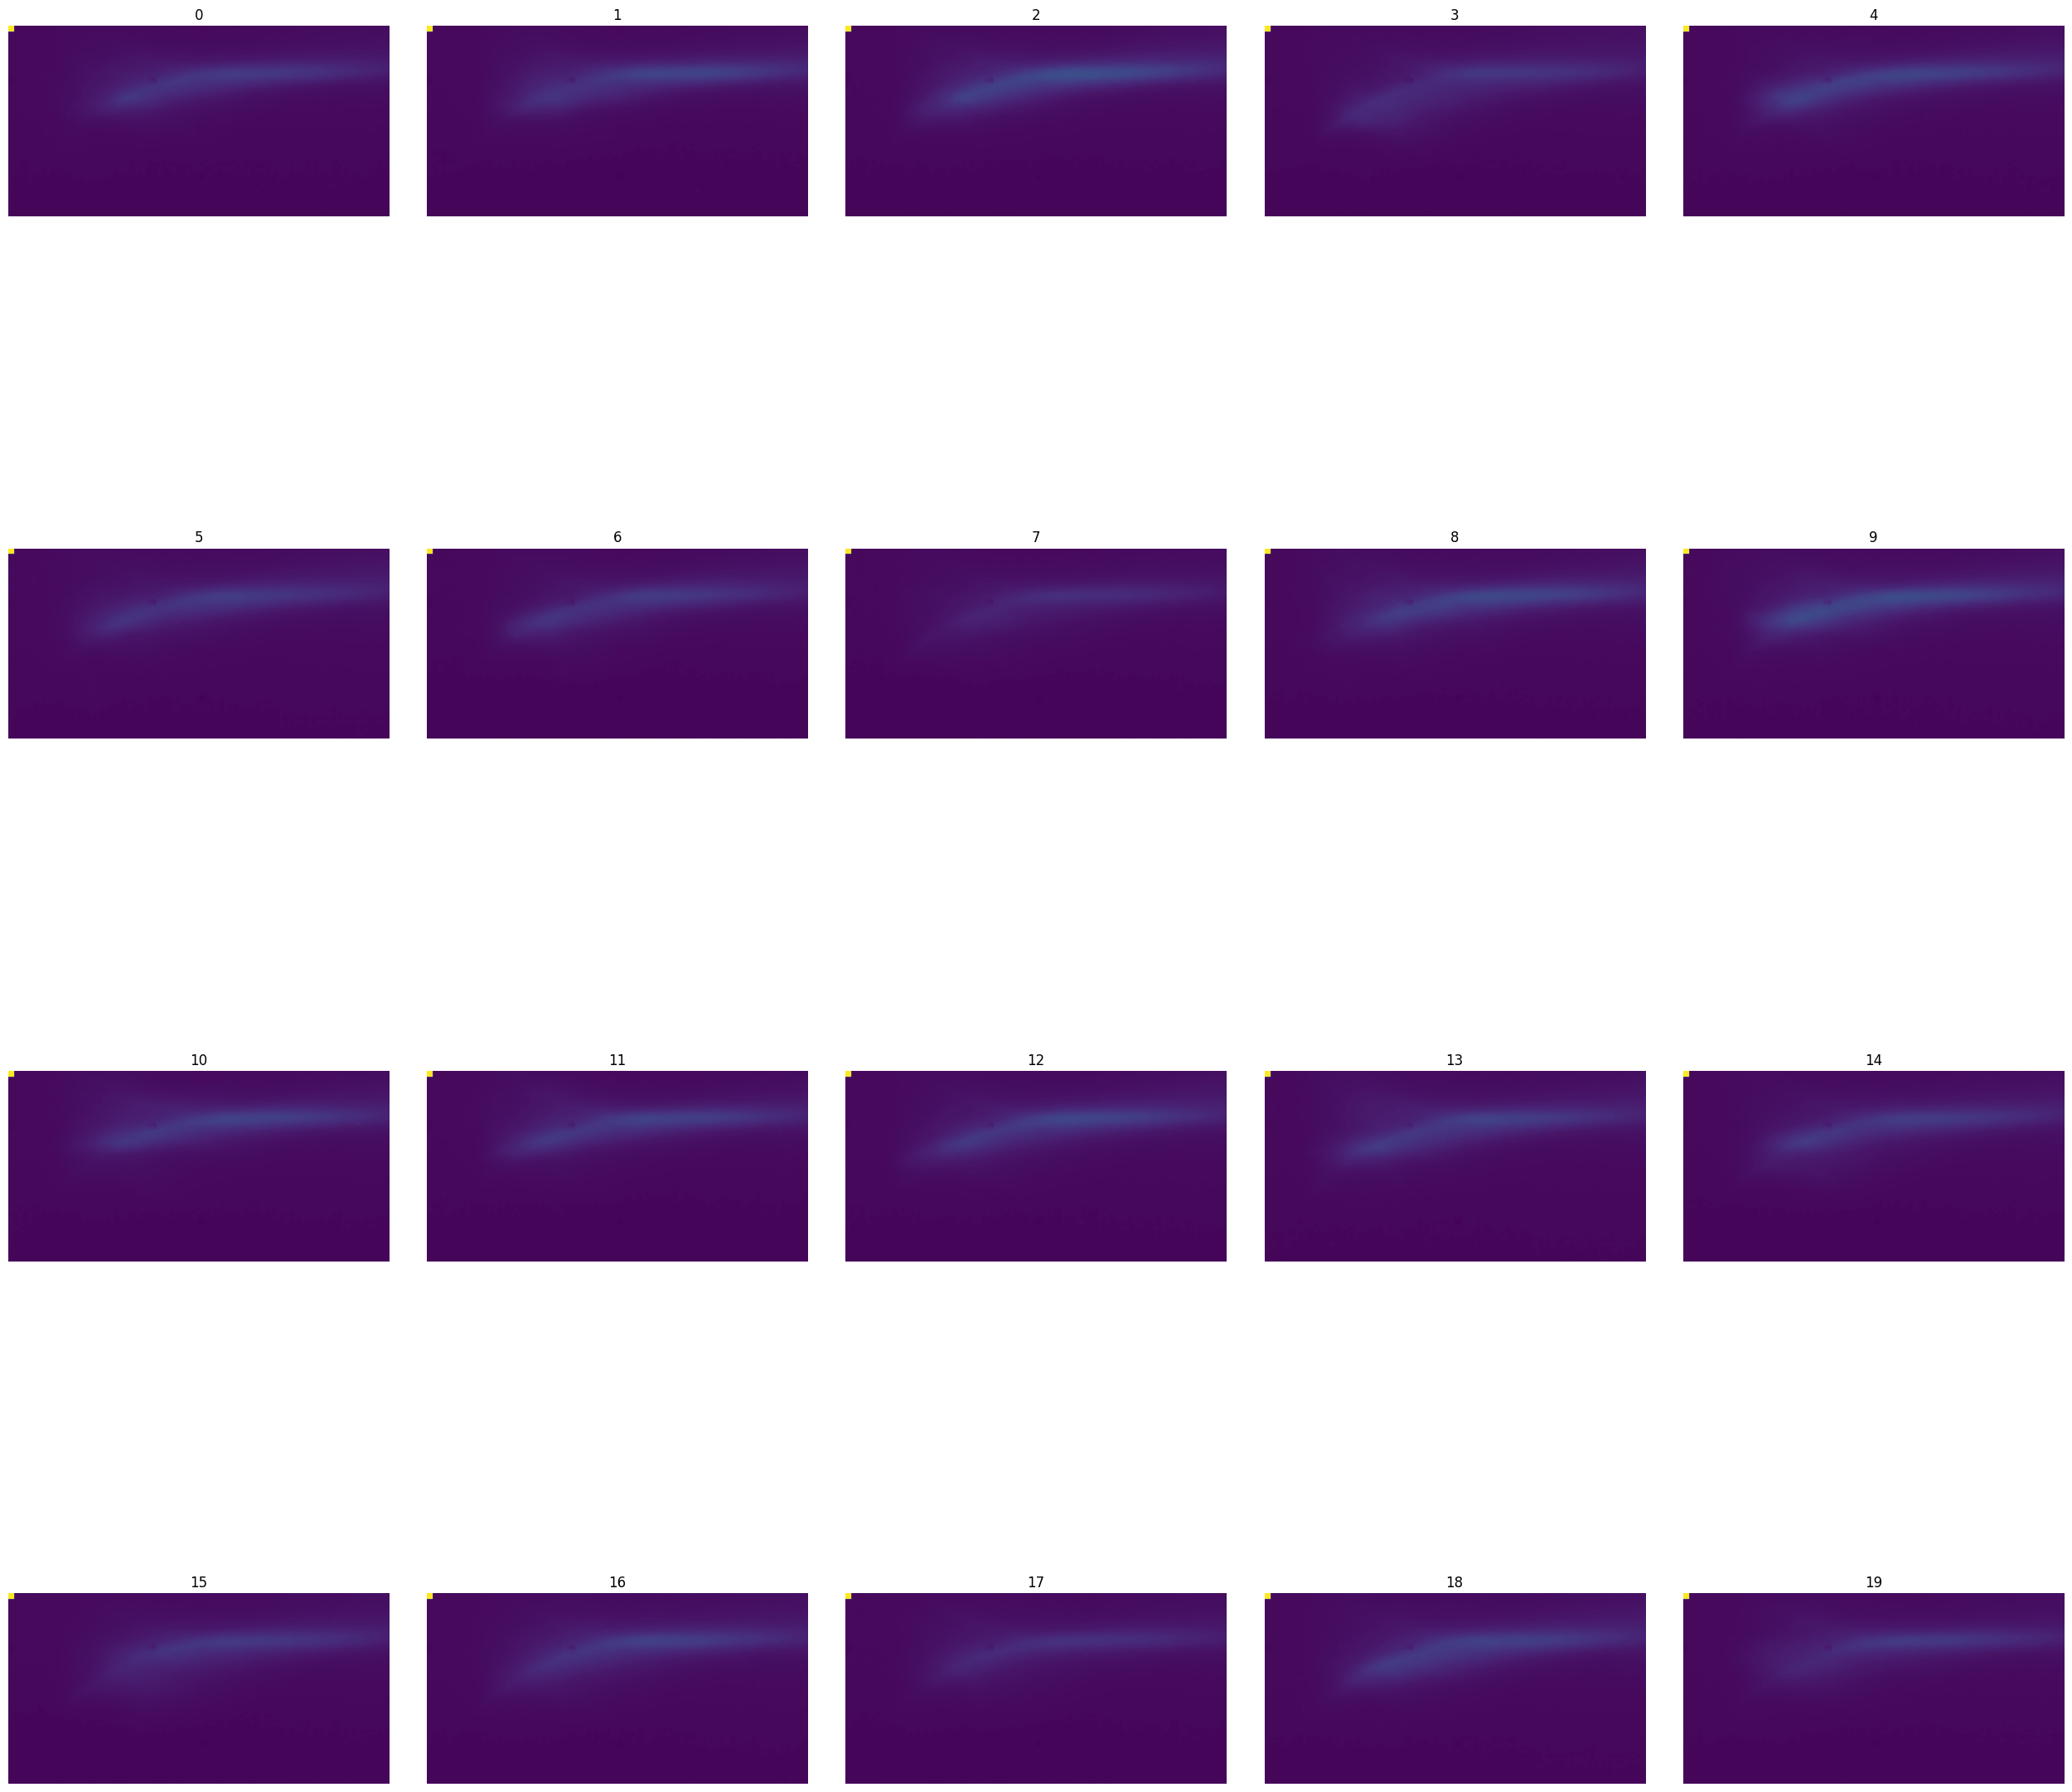

In [2]:
plot_images_from_dir("with_gain/9", 20)